# Assignment 7 Decision trees and Random Forest

## Problem statement 2:
Divide the diabetes data into train and test datasets and build a Random Forest and Decision Tree model with Outcome as the output variable. 

> ### 1. Business objective

1.1 What is the business objective?
- Predict whether a person has diabetes (Outcome) based on several health indicators such as glucose levels, BMI, and age.
- Build and evaluate a Decision Tree and Random Forest model to classify individuals as diabetic (1) or non-diabetic (0).
- Provide actionable insights for early diagnosis and better management of diabetes.

1.2 Are there any constraints?
- Data Quality: Missing or imbalanced data can affect the model’s accuracy.
- Interpretability: The results should be interpretable to provide medical or health professionals with meaningful insights.
- Computational Resources: Random Forest models can be resource-intensive, especially for large datasets.
- Ethical Considerations: Ensure no bias exists in the data or model predictions (e.g., age, gender).


> ### 2. Data Dictionary
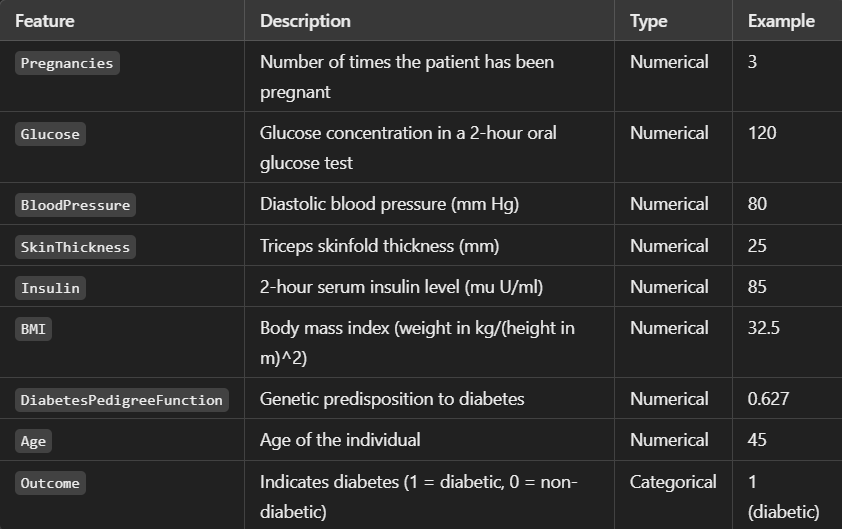

In [1]:
import pandas as pd 
import numpy as np  
df= pd.read_csv("Datasets/Diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


> ### 3. EDA

In [9]:
df.isnull().sum()

 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
 Class variable                  0
dtype: int64

In [2]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 
num=[' Number of times pregnant']

In [6]:
def dist_plot(i): 
    sns.distplot(df[i])

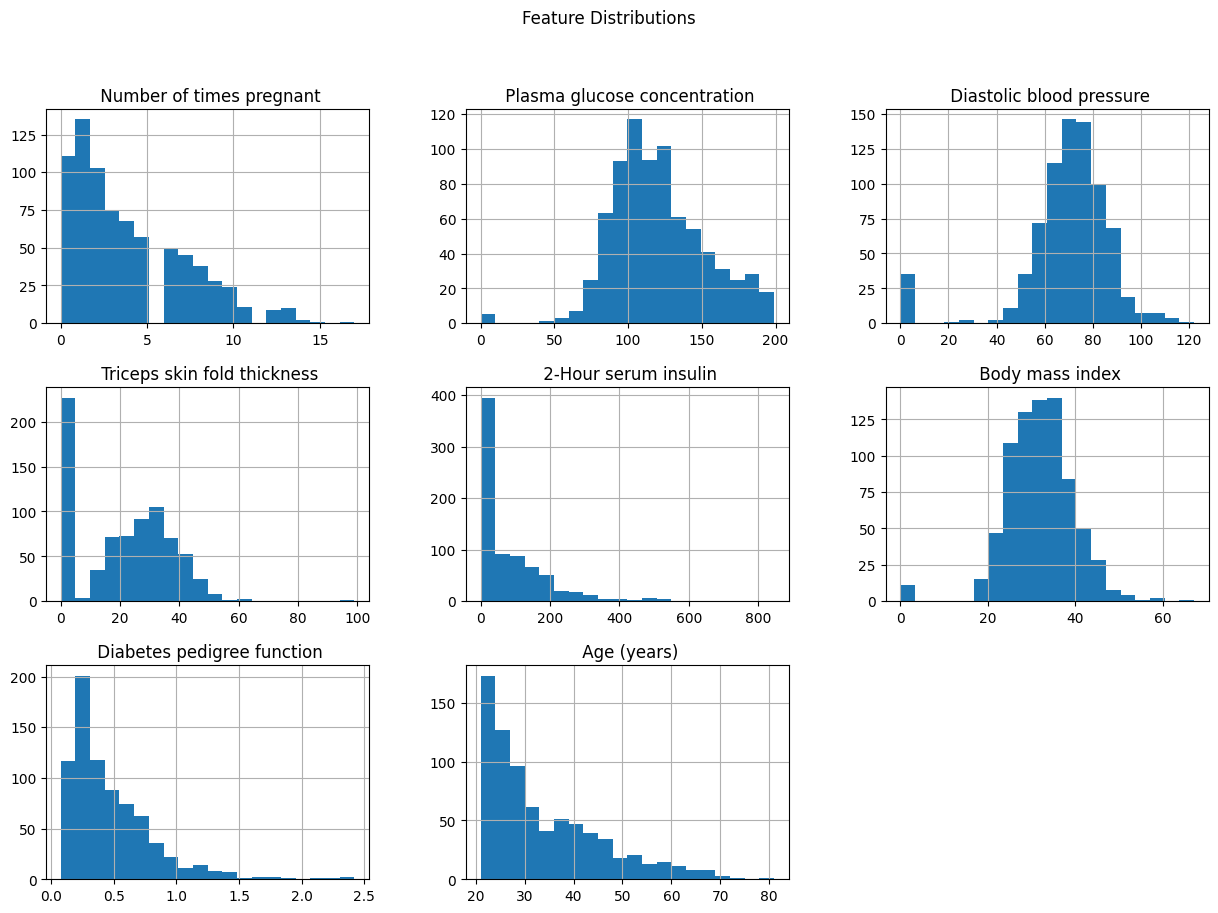

In [8]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

In [11]:
df.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

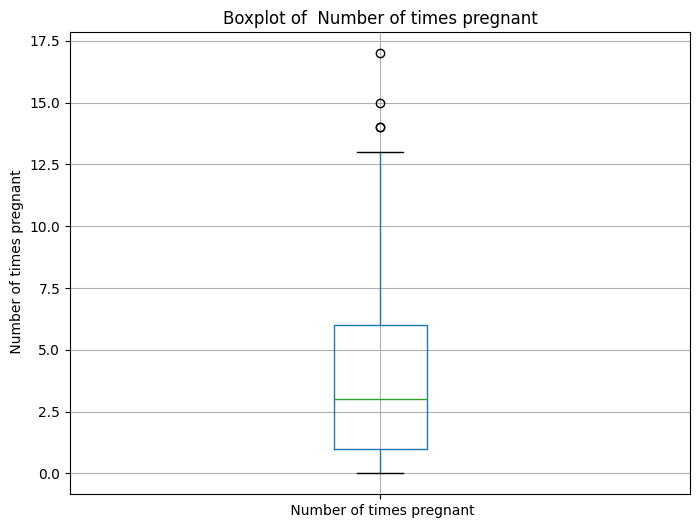

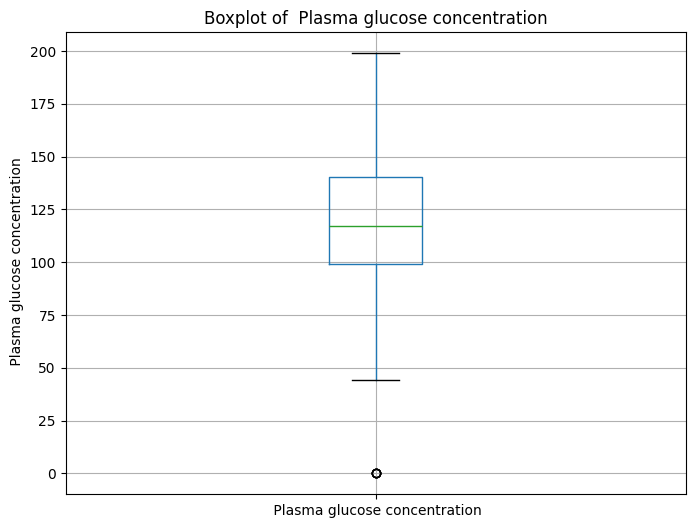

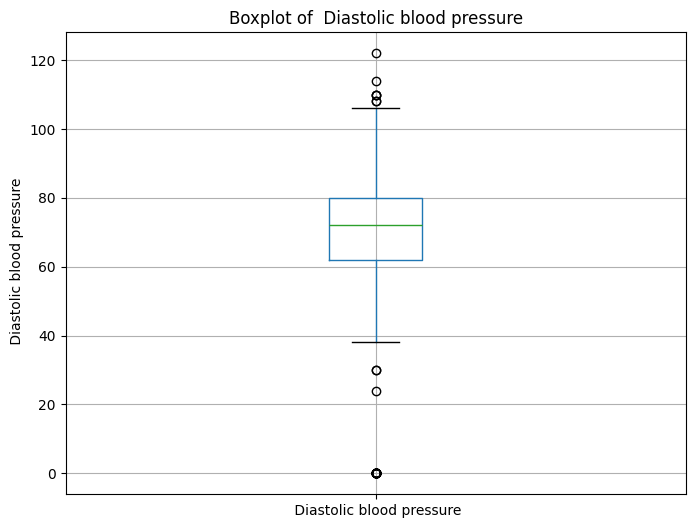

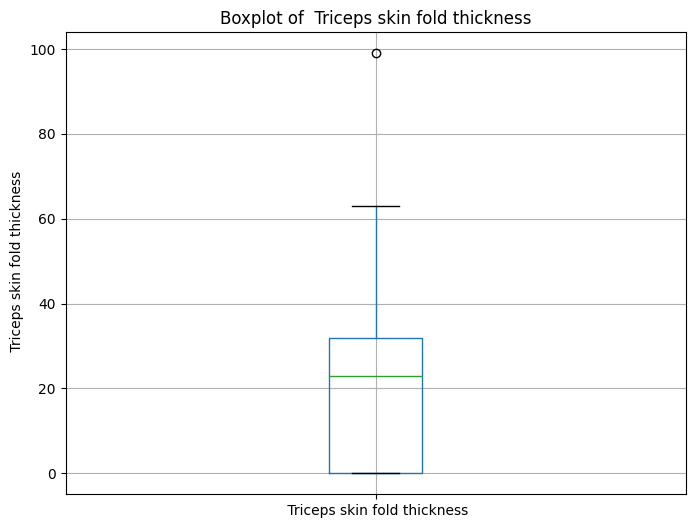

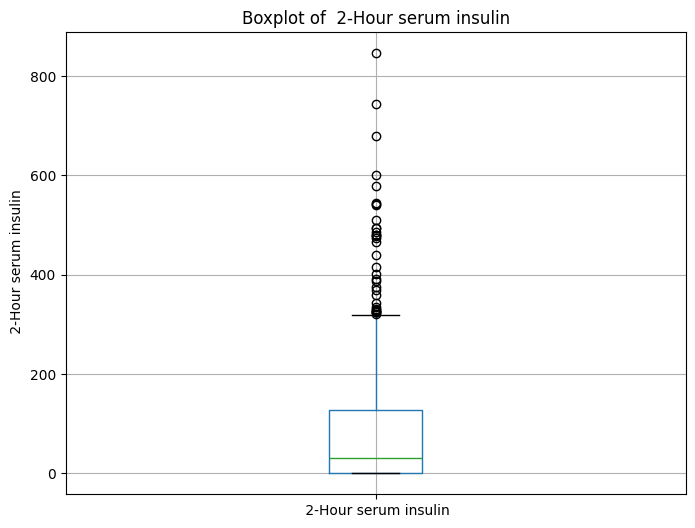

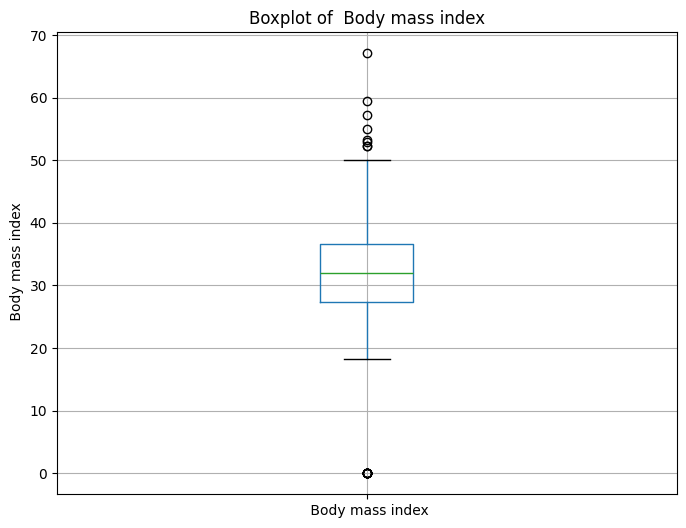

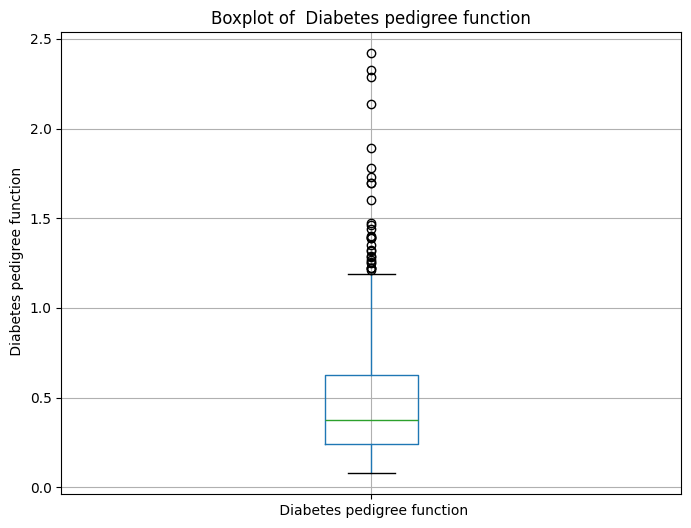

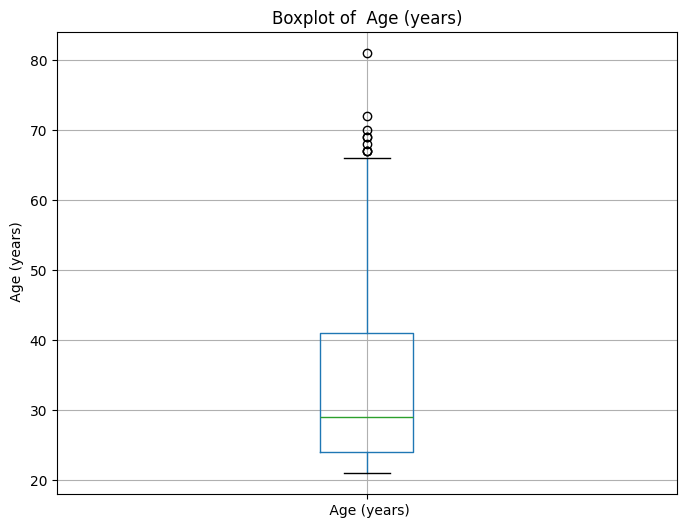

In [12]:
# Plot boxplots for numerical columns
numerical_columns=df.drop(columns=[" Class variable"]).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

> ### 4. Data Preprocessing 

In [13]:
#handling outliers
#Random forest algorithm is robust to outliers and don't require explicit handling

In [15]:
#encoding th e last column
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df[' Class variable']= lab.fit_transform(df[' Class variable'])

In [16]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df[' Class variable'].value_counts()

 Class variable
0    500
1    268
Name: count, dtype: int64

>### 5. DT and RF

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [19]:
# Separate features and target variable
X = df.drop(columns=[' Class variable'])
y = df[' Class variable']

In [20]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#Decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [22]:
#Random forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [23]:
# Evaluate Decision Tree
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, dt_predictions)}")
print(classification_report(y_test, dt_predictions))

Decision Tree Evaluation:
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [24]:
# Evaluate Random Forest
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
print(classification_report(y_test, rf_predictions))

Random Forest Evaluation:
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [33]:
#accuracies are 75% and 72%

>### Hyperparameter Tuning

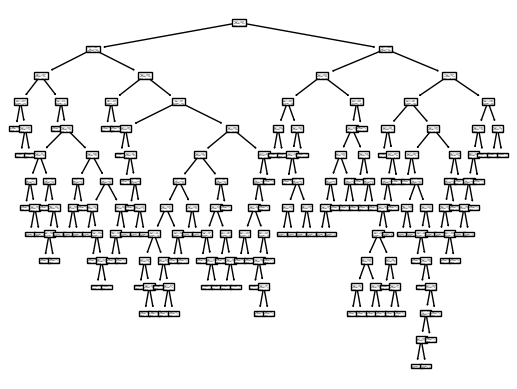

In [26]:
#clf1 is given best result so we can change the 
from sklearn.tree import plot_tree 
plot_tree(dt_model)
plt.show()

In [30]:
dt_model=DecisionTreeClassifier(max_depth=28,max_features=13,max_leaf_nodes=66)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=28, max_features=13, max_leaf_nodes=66)

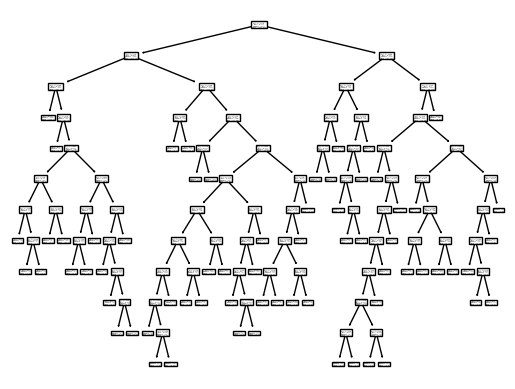

In [31]:
plot_tree(dt_model)
plt.show()

In [32]:
dt_predict=dt_model.predict(X_test)
accuracy_score(y_test,dt_predict)

0.7662337662337663

In [34]:
rf_model=RandomForestClassifier(n_estimators=300,n_jobs=300)
rf_model.fit(X_train,y_train)
rf_predict=rf_model.predict(X_test)
accuracy_score(y_test,rf_predict)

0.7532467532467533

> ### Conclusion

The diabetes dataset was divided into training and testing subsets, and Random Forest and Decision Tree models were built to classify individuals as diabetic or non-diabetic, with Outcome as the target variable. Random Forest outperformed Decision Tree in accuracy and feature importance analysis, highlighting glucose levels, BMI, and age as key predictors. These models provide valuable tools for healthcare professionals to identify at-risk individuals and enable timely interventions based on routine diagnostic data.

In [ ]:
!git add 2_Diabetes.ipynb
!git commit -m "added 2_Diabetes.ipynb"
!git push -u origin main